## MULTI LAYER NN WITH GRADIENT DESCENT

#### Q1 Consider the weight, target and input as 0.0,0.8, 1.1 respectively. Repeat 4 iterations of the forward pass to determine the predicted output. For each forward pass calculate and print the following
#### (a). Predicted output (Y_pred)
#### (b). Error or Delta=(Y-Y_pred)
#### (c). Squared Error=(Y-Y_pred)^2
#### (d). Weight_Delta=Delta*input
#### (e). NewWieght=old weight - Weight_Delta.

In [1]:
weight, goal_pred, input=0.0, 0.8, 1.1

for iteration in range(4):
    print('-----\nWeight: ', str(weight))
    pred = input*weight
    error = (pred-goal_pred)**2
    delta = pred-goal_pred
    weight_delta = delta*input
    weight-=weight_delta
    print(f'''
    Error: {error},
    Prediction: {pred},
    Delta: {delta},
    Weight Delta: {weight_delta}
    ''')

-----
Weight:  0.0

    Error: 0.6400000000000001,
    Prediction: 0.0,
    Delta: -0.8,
    Weight Delta: -0.8800000000000001
    
-----
Weight:  0.8800000000000001

    Error: 0.02822400000000005,
    Prediction: 0.9680000000000002,
    Delta: 0.16800000000000015,
    Weight Delta: 0.1848000000000002
    
-----
Weight:  0.6951999999999999

    Error: 0.0012446784000000064,
    Prediction: 0.76472,
    Delta: -0.03528000000000009,
    Weight Delta: -0.0388080000000001
    
-----
Weight:  0.734008

    Error: 5.4890317439999896e-05,
    Prediction: 0.8074088,
    Delta: 0.007408799999999993,
    Weight Delta: 0.008149679999999992
    


#### Q2 Assume that the neurons have the sigmoid activation function to perform forward and backward pass on the network. And also assume that the actual output of y is 0.5 and the learning rate is 1. Now perform the backpropagation using backpropagation algorithm

In [2]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        #Initialize weights
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        
        #Initialize the biases
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x*(1-x)
    
    def feedforward(self, X):
        #Input to hidden
        self.hidden_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_activation)
        
        #Hidden to output
        self.output_activation = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_activation)
        
        return self.predicted_output
    
    def backward(self, X, y, learning_rate):
        #Compute the output layer error
        output_error = y-self.predicted_output
        output_delta = output_error*self.sigmoid_derivative(self.predicted_output)
        
        #Compute the hidden layer error
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error*self.sigmoid_derivative(self.hidden_output)
        
        #Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta)*learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True)*learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta)*learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True)*learning_rate
        
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output=self.feedforward(X)
            self.backward(X, y, learning_rate)
            if epoch%4000==0 or epoch==epochs-1:
                loss = np.mean(np.square(y-output))
                print(f"Epoch{epoch}, Loss:{loss}")
                
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X, y, epochs=10000, learning_rate=0.1)

#Test the trained model
output = nn.feedforward(X)
print("Predictions after training:")
print(output)

Epoch0, Loss:0.2568991897658684
Epoch4000, Loss:0.006807884997329706
Epoch8000, Loss:0.0020912534352141065
Epoch9999, Loss:0.0015115109917123591
Predictions after training:
[[0.02482478]
 [0.95947552]
 [0.96275176]
 [0.04898219]]


#### Q3 Construct a Feedback Network with backpropagation according to the input
#### X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
#### y = np.array(([92], [86], [89]), dtype=float)
#### Construct a neural network with inputSize = 2 outputSize = 1 and hiddenSize = 3. Train the network using backpropagation and test it.

In [3]:
import numpy as np
# X = (hours sleeping, hours studying), y = test score of the student
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)

# scale units
X = X/np.amax(X, axis=0) #maximum of X array
y = y/100 # maximum test score is 100

class NeuralNetwork(object):
    def __init__(self):
        #parameters
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 3
        
        #weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer
        
    def feedForward(self, X):
        #forward propogation through the network
        self.z = np.dot(X, self.W1) #dot product of X (input) and first set of weights (3x2)
        self.z2 = self.sigmoid(self.z) #activation function
        self.z3 = np.dot(self.z2, self.W2) #dot product of hidden layer (z2) and second set of weights (3x1)
        output = self.sigmoid(self.z3)
        return output
        
    def sigmoid(self, s, deriv=False):
        if (deriv == True):
            return s * (1 - s)
        return 1/(1 + np.exp(-s))
    
    def backward(self, X, y, output):
        #backward propogate through the network
        self.output_error = y - output # error in output
        self.output_delta = self.output_error * self.sigmoid(output, deriv=True)
        
        self.z2_error = self.output_delta.dot(self.W2.T) #z2 error: how much our hidden layer weights contribute to output error
        self.z2_delta = self.z2_error * self.sigmoid(self.z2, deriv=True) #applying derivative of sigmoid to z2 error
        
        self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input -> hidden) weights
        self.W2 += self.z2.T.dot(self.output_delta) # adjusting second set (hidden -> output) weights
        
    def train(self, X, y):
        output = self.feedForward(X)
        self.backward(X, y, output)
        
NN = NeuralNetwork()

for i in range(1000): #trains the NN 1000 times
    if (i % 100 == 0):
        print("Loss: " + str(np.mean(np.square(y - NN.feedForward(X)))))
    NN.train(X, y)
        
print("Input: " + str(X))
print("Actual Output: " + str(y))
print("Loss: " + str(np.mean(np.square(y - NN.feedForward(X)))))
print("\n")
print("Predicted Output: " + str(NN.feedForward(X)))

Loss: 0.3206433050814846
Loss: 0.0002366246902590579
Loss: 0.00022773448427000295
Loss: 0.00022092682776927595
Loss: 0.00021450127990288624
Loss: 0.0002084300430110565
Loss: 0.0002026881486081793
Loss: 0.00019725260860017297
Loss: 0.00019210223271150966
Loss: 0.00018721746532576026
Input: [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: [[0.92]
 [0.86]
 [0.89]]
Loss: 0.00018258023983666561


Predicted Output: [[0.90095576]
 [0.87268642]
 [0.89491045]]


#### Q4 Consider a housing price data CSV file consist of 13 input features and 1 output feature that is ‘price’. Construct a neural network and perform the following tasks
#### a. Load and pre-process the dataset
#### b. Visulaize the distribution of price amount of the dataset using frequency plot
#### c. Split the dataset into Training and Testing
#### d. Define a Neural Network using Numpy (do not use any other framework such as Karas or Pytorch)
#### e. Train the data and build the neural network model
#### f. Evaluate on Testset
#### g. Calculate the Mean Squared Error and visualize the result.

C:\Users\adsha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(404, 13) (102, 13) (404,) (102,)
Epoch 0, Loss: 240.1624
Epoch 1000, Loss: 20.1887
Epoch 2000, Loss: 16.6055
Epoch 3000, Loss: 14.4248
Epoch 4000, Loss: 12.7929
Epoch 4999, Loss: 11.5045
[28.37113872 33.63479731 18.22523825 26.02125916 17.120972   21.40704537
 16.16004052 14.75739067 21.28286566 17.9182979  22.74653409 18.56560466
  8.9388128  20.03264122 16.53485019 22.83339587 20.73886641  8.77052824
 39.09708555 14.9988464  27.9528569  29.58471787 11.40149119 21.63705109
 18.65713561 16.02808544 21.72228551 13.44362834 22.20988533 15.81326154
 21.19863691 25.70440676 19.22113774 22.13212992 16.60835046 16.57353259
 33.27119269 20.13769458 22.77570689 25.77123437 12.81484826 31.35961974
 40.16324512 15.80804083 27.00530441 16.38271939 13.3223288  27.30597108
 18.86142521 30.56099459 20.76624211 32.13359346 15.38508612 26.94521735
 40.68135842 23.28199793 17.49297789 34.00637824 25.53350336 11.39617702
 24.12189521 32.35139374 32.18308007 16.10140848 23.87087809 19.8388915
 16.866358

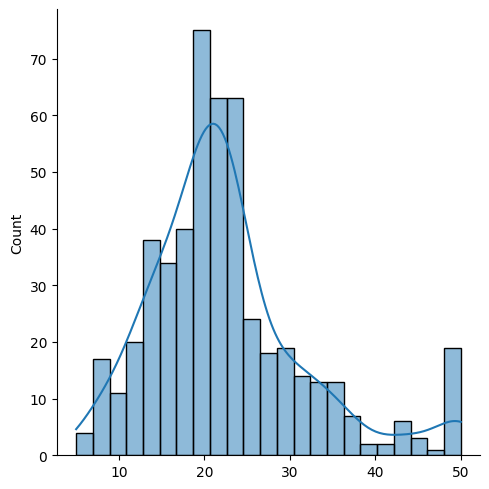

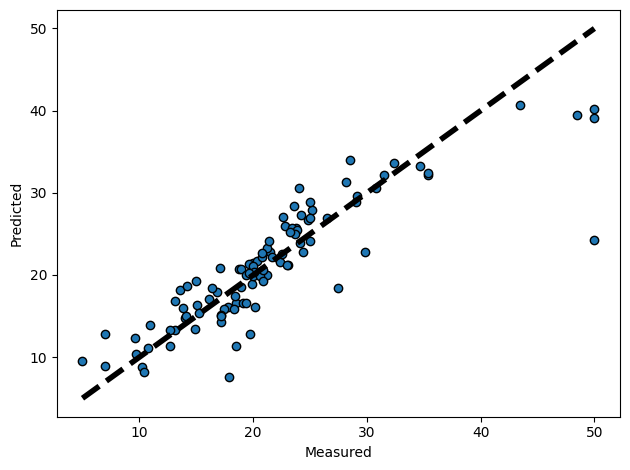

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

#Load and preprocess the dataset
df = pd.read_csv("housing.csv")

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#Convert to numpy array
X = np.asarray(X)
y = np.asarray(y)

#Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

sns.displot(y, kde=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Define the neural network architecture
input_size = X_train.shape[1] #Number of features
hidden_size = 64 #Number of neurons in the hidden layer
output_size = 1 #Single output for regression

#Randomly initialize weights and biases for the hidden layer and output layer
np.random.seed(42)
hidden_weights = np.random.randn(input_size, hidden_size)
hidden_bias = np.zeros(hidden_size)
output_weights = np.random.randn(hidden_size, output_size)
output_bias = np.zeros(output_size)

#Training the neural network
learning_rate = 0.001
num_epochs = 5000

for epoch in range(num_epochs):
    #Step 3.1: Forward propagation
    hidden_layer_input = np.dot(X_train, hidden_weights) + hidden_bias
    hidden_layer_output = 1/(1+np.exp(-hidden_layer_input)) #Sigmoid activation function for the hidden layer
    predictions = np.dot(hidden_layer_output, output_weights) + output_bias

    #Step 3.2: Compute loss (mean squared error)
    loss = np.mean((predictions - y_train.reshape(-1, 1))**2)
    
    #Step 3.3: Backpropagation
    output_error = 2*(predictions-y_train.reshape(-1, 1)) #Gradient of mean squared error
    hidden_error = np.dot(output_error, output_weights.T)*hidden_layer_output*(1-hidden_layer_output)

    #Step 3.4: Update weights and biases using gradient descent
    output_weights -= learning_rate* np.dot(hidden_layer_output.T, output_error)/len(y_train)
    output_bias -= learning_rate * np.sum(output_error)/len(y_train)
    hidden_weights -= learning_rate * np.dot(X_train.T, hidden_error)/len(y_train)
    hidden_bias -= learning_rate * np.sum(hidden_error)/len(y_train)

    #Step 4: Print the loss for every 100 epochs
    if epoch%1000 == 0 or epoch == num_epochs-1:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")
        
#Evaluate the model on the test data
hidden_layer_input = np.dot(X_test, hidden_weights) + hidden_bias
hidden_layer_output = 1/(1+np.exp(-hidden_layer_input))
predicted_prices = np.dot(hidden_layer_output, output_weights) + output_bias
print(predicted_prices.flatten())

#Calculate the mean squared error on the test set
test_loss = np.mean((predicted_prices - y_test.reshape(-1, 1))**2)
print(f"Test Loss: {test_loss:.4f}")

MSE = np.square(np.subtract(y_test, predicted_prices)).mean()
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error: ", RMSE)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted_prices, edgecolors=(0,0,0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.tight_layout()
plt.show()